# Twitter Sentiment Analysis 
This notebook is for analysing sentiments on student tweets about their universities, in order to build a 'happiness ranking'. 

To do that we first need the Twitter accounts of as many universities as we can. I have picked up a dataset of the top 1000 universities, which doesn't have the Twitter accounts, so I had to use the Twitter Search API to try and match the university name to the account.

I have (almost) successfully found the Twitter handles. Out of the 1000 top universities, I have found matches for 879 of them, and 121 are without a match. Those with matches are not all entirely accurate, since some universities don't have Twitter accounts and my script picked up professors mentioning the school instead, or incorrect account due to non-English names and descriptions.  

The source for the 1000 top universities in the world was the [Center for World University Rankings](http://cwur.org/).

### The objective is to:
- Find tweets from students talking about their University
- Get the sentiment of those tweets
- Assign an average to each University
- Rank each University by the polarity
- Compare the 'happiness' ranking against the actual ranking :) 
----

In [1]:
import numpy as np 
import pandas as pd 
import json
from pandas.io.json import json_normalize
import re
import nltk 
import matplotlib.pyplot as plt
import tweepy

auth = tweepy.OAuthHandler("oVq7zR1YTcpnqhlZM6XUQq4wE", "OWRoXrcfOT2scAOjK8xnM8GPd3PSByFkH7rQTkEuR8BHUDh1uU")
auth.set_access_token("994307900397977600-nGTL6FUGqTlIYl77RjGYTfyia3rdUCX", "SHKtOWRQGBTxb0tovzDwqpQUkJXtc2A7wHyOT5KNNwT7X")

api = tweepy.API(auth)

## Searching for Tweets
This is currently using the Twitter API via Tweepy, but it needs more granularity.
We're interested in Tweets that:
* a) are from students (or faculty?)
* b) are aimed at their university
* c) are clearly not troll/spam/bots
* d) are written in English

In [2]:
results = api.search(q='@Harvard', count=100)
print(list(map(lambda result: result.text, results)))

['@ChristensenInst Condolences to the Family &amp; friends of Prof @claychristensen @HarvardHealth @HarvardChanSPH… https://t.co/Pz2hFT4Kcn', "@Harvard I suppose we shouldn't be surprised that you're not showing photos of the dozens of mice who were tormente… https://t.co/cifHYnrvPE", '#Students who are interested in applying to @Harvard should check out these helpful tips and stats on the… https://t.co/3PDDIsrgBW', '@jonathan_rb @BetoFMV @madeiradez @Harvard Os ricos iam viver em comunidades isoladas ué? Alguém mais importa?', 'RT @namshine: .@jenniferhollett is about to give a “How to be more persuasive” @Harvard class and look who’s here? My former boss @dkines @…', 'RT @BetoFMV: 50 milhões (= população da Argentina) de pessoas isoladas em quarentena no ano novo chinês.\n\nEpidemiologista de @Harvard diz q…', 'RT @BetoFMV: 50 milhões (= população da Argentina) de pessoas isoladas em quarentena no ano novo chinês.\n\nEpidemiologista de @Harvard diz q…', 'RT @Harvard: The Center for t

In [3]:
# function to convert _json to JSON
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

tweets = [jsonify_tweepy(tweet) for tweet in results]

df = json_normalize(tweets)
print (df['text'])

0     @ChristensenInst Condolences to the Family &am...
1     @Harvard I suppose we shouldn't be surprised t...
2     #Students who are interested in applying to @H...
3     @jonathan_rb @BetoFMV @madeiradez @Harvard Os ...
4     RT @namshine: .@jenniferhollett is about to gi...
                            ...                        
95    Engineered miniature kidneys come of age https...
96    @bigfatsurprise @KenDBerryMD @Harvard Foia req...
97    RT @dadofccx3: @waltshaub @NPRKelly Also consi...
98    RT @BetoFMV: 50 milhões (= população da Argent...
99    RT @BetoFMV: 50 milhões (= população da Argent...
Name: text, Length: 100, dtype: object


In [4]:
is_student = df['user.description'].str.lower().str.contains('student')

/Users/slav/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/slav/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127384 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/slav/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/slav/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/slav/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/slav/opt/anaconda3/lib/python3.7/site-packages/matplotlib/ba

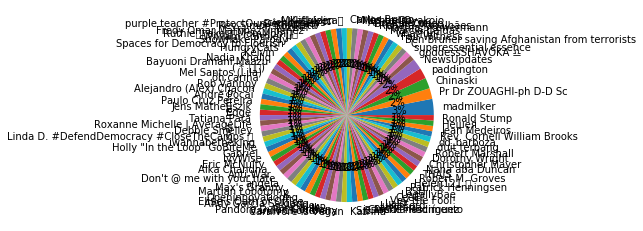

In [5]:
df['user.name'].value_counts().plot(kind='pie', autopct='%1.0f%%')